In [1]:
import numpy as np
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 数据加载

In [2]:
data=[]
with open('data.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0]!="x1":
            data.append(row)
data = np.array(data,dtype='float')

y  = np.arange(30)
for i in y:
    y[i] = i/10
data

array([[ 0.28 ,  1.31 , -6.2  ],
       [ 0.07 ,  0.58 , -0.78 ],
       [ 1.54 ,  2.01 , -1.63 ],
       [-0.44 ,  1.18 , -4.32 ],
       [-0.81 ,  0.21 ,  5.73 ],
       [ 1.52 ,  3.16 ,  2.77 ],
       [ 2.2  ,  2.42 , -0.19 ],
       [ 0.91 ,  1.94 ,  6.21 ],
       [ 0.65 ,  1.93 ,  4.38 ],
       [-0.26 ,  0.82 , -0.96 ],
       [ 0.011,  1.03 , -0.21 ],
       [ 1.27 ,  1.28 ,  0.08 ],
       [ 0.13 ,  3.12 ,  0.16 ],
       [-0.21 ,  1.23 , -0.11 ],
       [-2.18 ,  1.39 , -0.19 ],
       [ 0.34 ,  1.96 , -0.16 ],
       [-1.38 ,  0.94 ,  0.45 ],
       [-0.12 ,  0.82 ,  0.17 ],
       [-1.44 ,  2.31 ,  0.14 ],
       [ 0.26 ,  1.94 ,  0.08 ],
       [ 1.36 ,  2.17 ,  0.14 ],
       [ 1.41 ,  1.45 , -0.38 ],
       [ 1.22 ,  0.99 ,  0.69 ],
       [ 2.46 ,  2.19 ,  1.31 ],
       [ 0.68 ,  0.79 ,  0.87 ],
       [ 2.51 ,  3.22 ,  1.35 ],
       [ 0.6  ,  2.44 ,  0.92 ],
       [ 0.64 ,  0.31 ,  0.97 ],
       [ 0.85 ,  0.58 ,  0.99 ],
       [ 0.66 ,  0.51 ,  0.88 ]])

## 欧式距离

In [3]:
def Distance(x1,x2):
    return math.sqrt(sum((x1-x2)**2))

# KNN

In [4]:
def KNN(data,x_predict,N):
   
    
    distances = [Distance(i,x_predict) for i in data]
    
    y_predict = np.sort(distances)[N-1]
    
    P = N/data.shape[0]/(y_predict**data.shape[1])
    
    return P

# 题目a

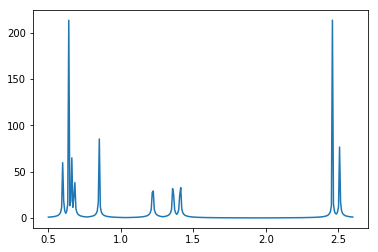

In [5]:
dataw31 = data[y==2,0:1]
X = np.linspace(0.5,2.6, 300)


Y = [KNN(dataw31,x,1) for x in X] 
plt.plot(X,Y)



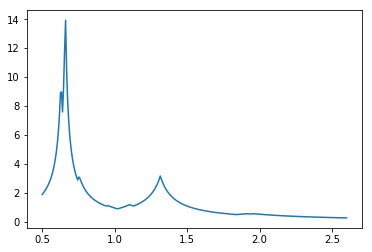

In [6]:
Y = [KNN(dataw31,x,3) for x in X] 
plt.plot(X,Y)

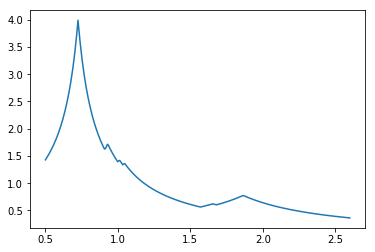

In [7]:
Y = [KNN(dataw31,x,5) for x in X] 
plt.plot(X,Y)


# 题目b

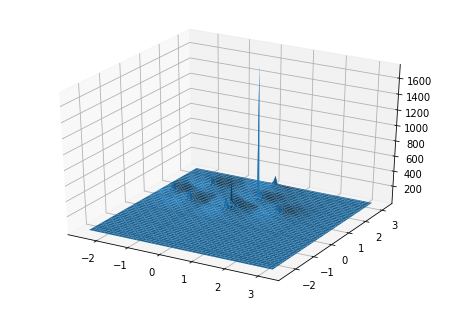

In [8]:

dataw212 = data[y==1,0:2]
X = np.linspace(-2.5,3.2, 100)
fig =plt.figure()
ax = Axes3D(fig)


x0, x1 = np.meshgrid(X,X)
Y = []
for i in range(100):
    p = []
    for j in range(100):
        p.append(KNN(dataw212,np.array([x0[i][j],x1[i][j]]),1)) 
    Y.append(p)
Y = np.array(Y)

ax.plot_surface(x0,x1,Y)

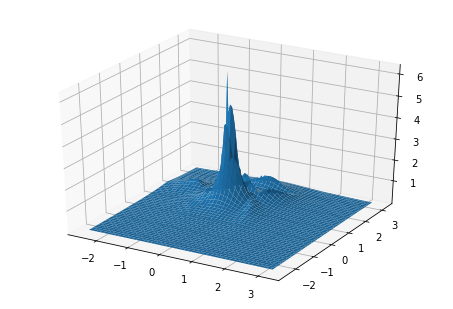

In [9]:
Y = []
for i in range(100):
    p = []
    for j in range(100):
        p.append(KNN(dataw212,np.array([x0[i][j],x1[i][j]]),3)) 
    Y.append(p)
Y = np.array(Y)

fig =plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0,x1,Y)

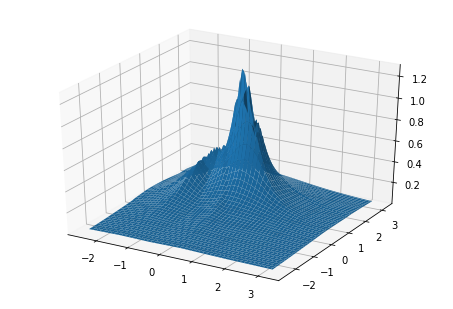

In [10]:
Y = []
for i in range(100):
    p = []
    for j in range(100):
        p.append(KNN(dataw212,np.array([x0[i][j],x1[i][j]]),5)) 
    Y.append(p)
Y = np.array(Y)

fig =plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x0,x1,Y)

# 题目c

In [11]:
samples = []
samples.append([-0.41, 0.82, 0.88])
samples.append([0.14, 0.72, 4.1])
samples.append([-0.81, 0.61, -0.38])

for sample in samples:
    print('测试点： '+str(sample))
    for i in range(3):
        print(KNN(data[y==i],sample,3))
    print()
    

测试点： [-0.41, 0.82, 0.88]
0.00879596401261926
0.2316258001827014
0.18694232321483134

测试点： [0.14, 0.72, 4.1]
0.017964386176866166
0.0040412635615593925
0.008591866296713964

测试点： [-0.81, 0.61, -0.38]
0.01102829558991302
0.3638189115792198
0.03729004696183931

